In [ ]:
!pip install lasio
!pip install welly

In [44]:
from os import path
import matplotlib.pylab as plt
import numpy as np

import lasio

In [5]:
DATAPATH = path.expanduser("~/Downloads")

In [12]:
# this data has a COP_Proteus-1ST2_CH_QSLT_PnS_Processed_PTS.PDF associated with it
las = lasio.read(path.join(DATAPATH, "COP_Proteus-small/COP_Proteus-1ST2_CH_QSLT_PnS_Processed_PTS.las"))

In [14]:
data = las.df()

In [15]:
print (data.columns)

Index(['DTCO', 'GR_STGC'], dtype='object')


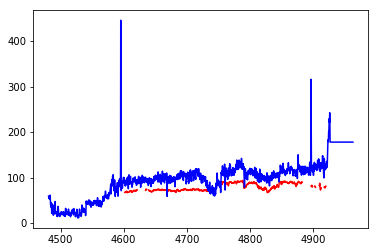

In [18]:
plt.plot(data['DTCO'], '-r')
plt.plot(data['GR_STGC'] ,'-b')
plt.show()

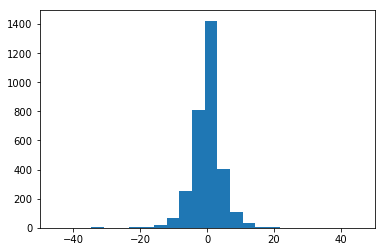

In [40]:
med = data['GR_STGC'].rolling(window=10, center=True).median()
dmed = data['GR_STGC'] - med
indx = ~np.isnan(med)
plt.hist(dmed[indx],100)
plt.xlim([-50,50])
plt.show()

In [42]:
indx = np.abs(data['GR_STGC'] - med > 30)
data['GR_STGC_filt'] = data['GR_STGC']              
data['GR_STGC_filt'][indx] = med[indx]

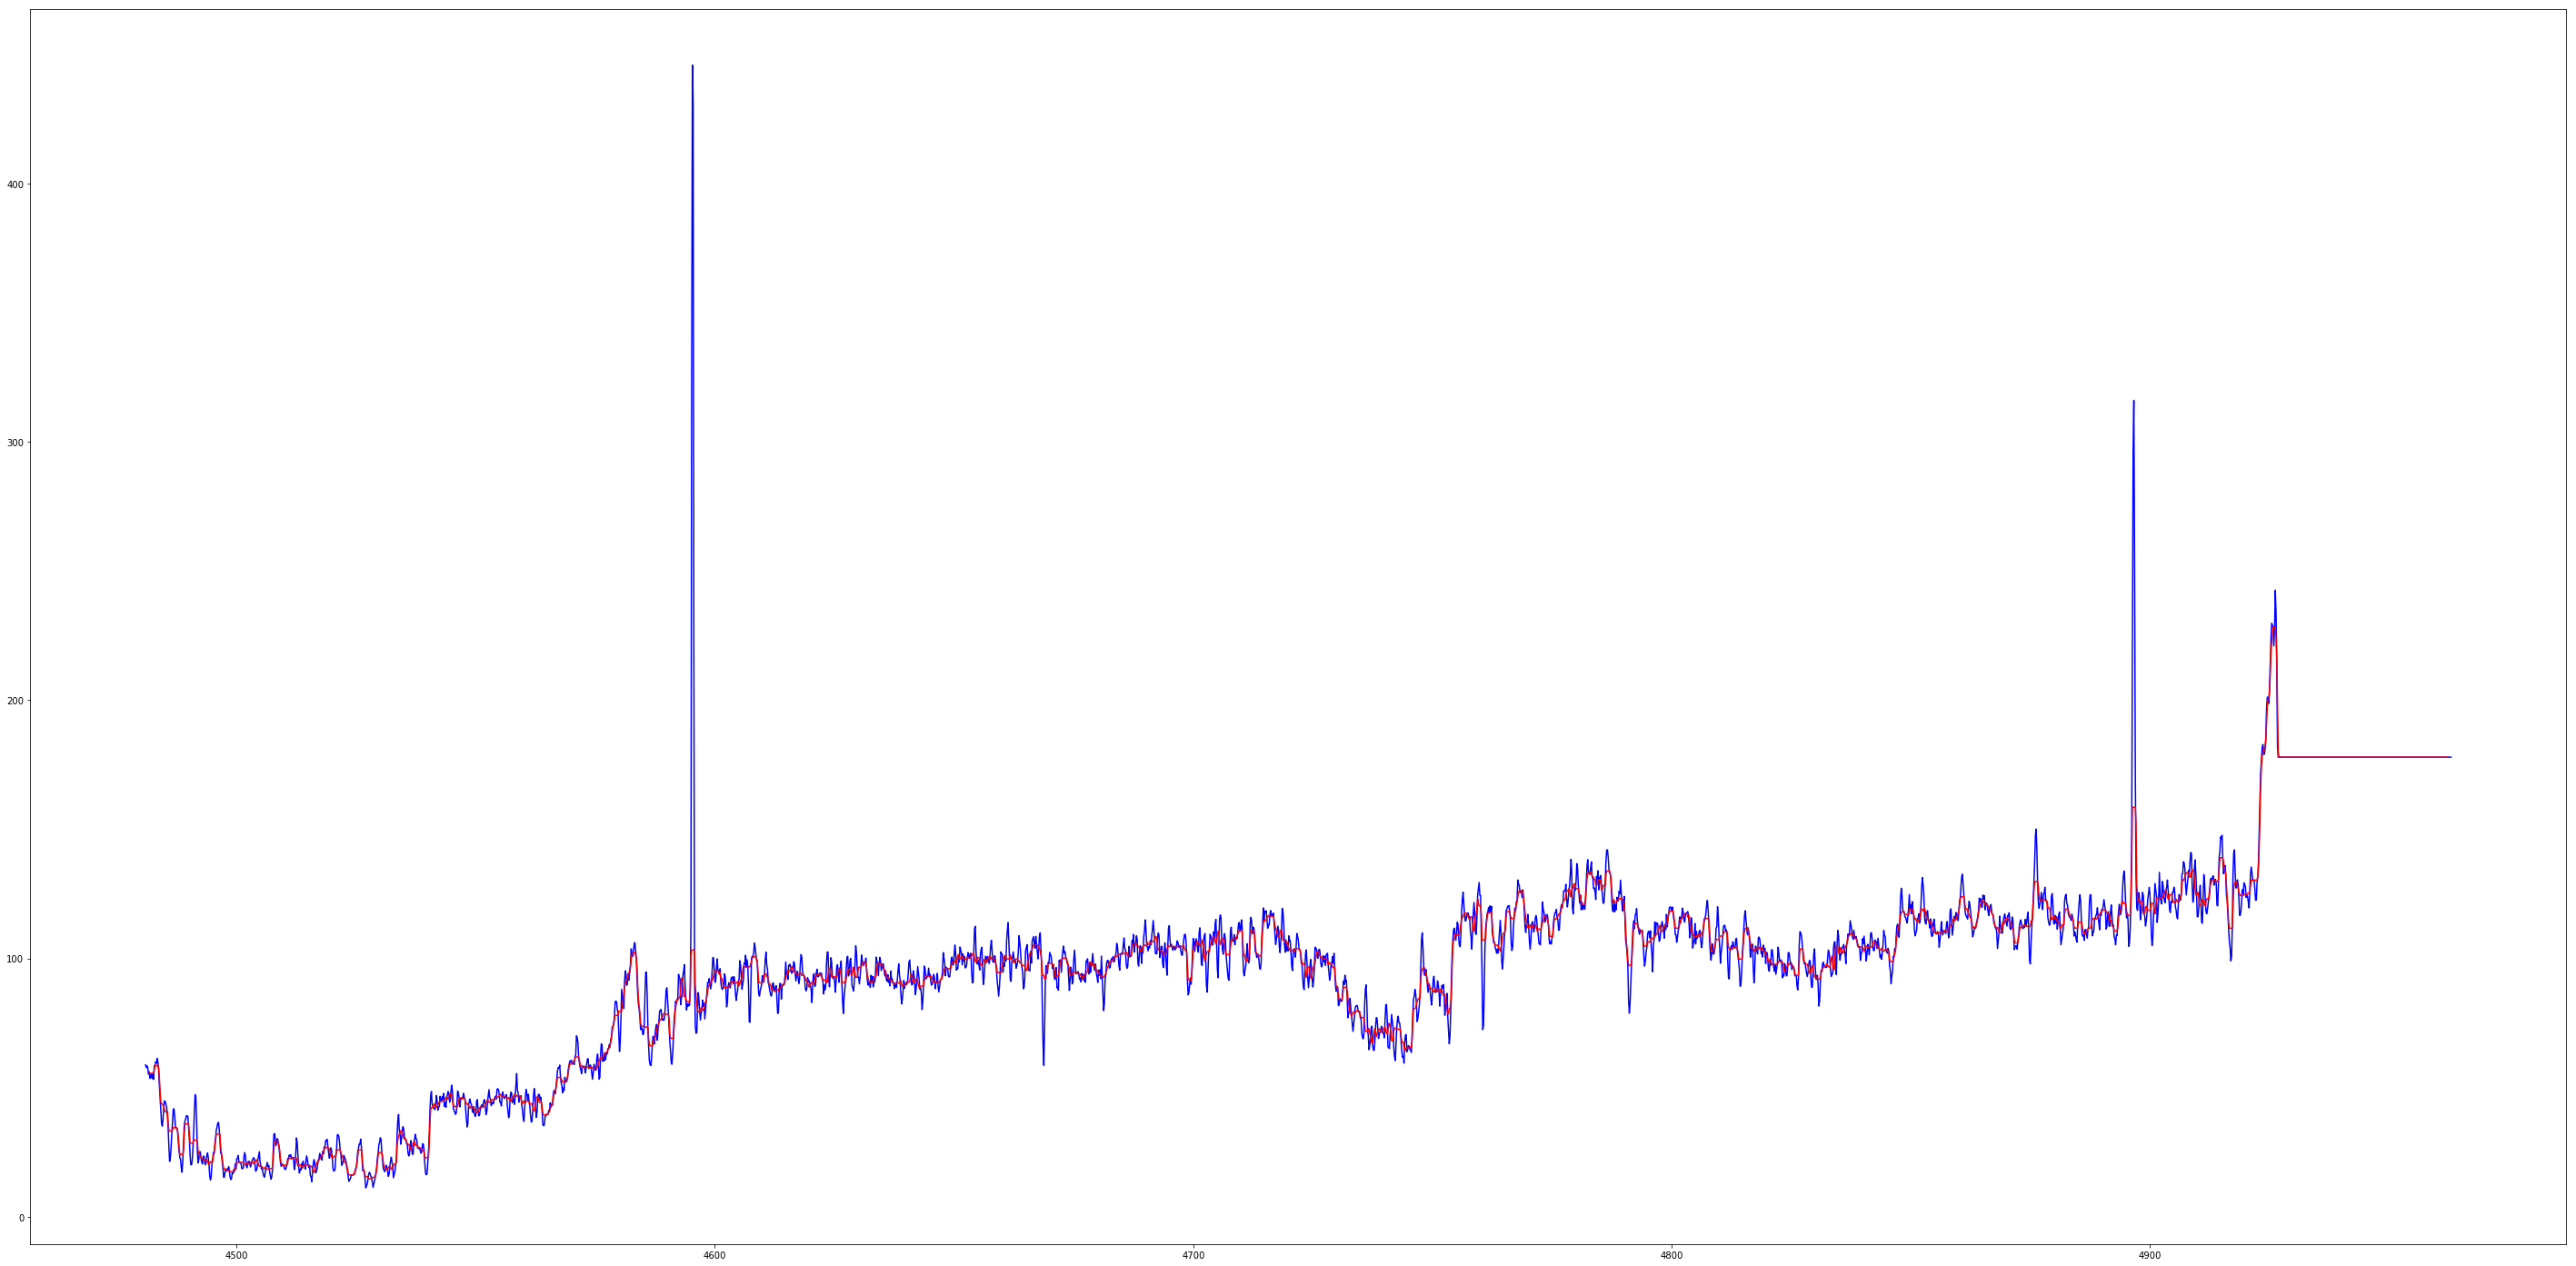

In [43]:
# data looks weird
plt.figure(figsize=(50,25))
plt.plot(data['GR_STGC'] ,'-b')
plt.plot(data['GR_STGC'].rolling(window=10, center=True).median(),'-r')
plt.show()

In [ ]:
dm = data['GR_STGC'] - data['GR_STGC'].rolling(window=50, center=True).median()
